## Mã hóa one-hot (OHE) của các hạng mục thường xuất hiện

Chúng ta biết rằng cardinality cao và nhãn hiếm có thể khiến một số hạng mục nhất định chỉ xuất hiện trong tập huấn luyện, gây ra overfitting hoặc chỉ trong tập kiểm tra, sau đó các mô hình sẽ không biết cách chấm điểm các quan sát đó.

Chúng ta cũng đã tìm hiểu về mã hóa one-hot: nếu các biến hạng mục chứa nhiều nhãn thì bằng cách mã hóa lại chúng với các biến giả, chúng ta sẽ mở rộng không gian đặc trưng một cách đáng kể.

**Để tránh những rắc rối này, chúng ta chỉ có thể tạo biến giả cho các hạng mục thường xuất hiện nhất.** 


Quy trình này còn được gọi là mã hóa one-hot của các hạng mục hàng đầu.

Trên thực tế, trong giải pháp chiến thắng KDD 2009 cup: ["Winning the KDD Cup Orange Challenge with Ensemble Selection"](http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf), các tác giả giới hạn mã hóa one-hot cho 10 nhãn thường xuất hiện nhất của biến. Điều này có nghĩa là họ chỉ tạo một biến nhị phân cho mỗi nhãn trong số 10 nhãn thường xuất hiện nhất.

OHE của các hạng mục thường xuyên hoặc các hạng mục hàng đầu tương đương với việc nhóm tất cả các hạng mục còn lại thành một hạng mục mới. Chúng ta sẽ hiểu rõ hơn về việc nhóm các giá trị hiếm vào một hạng mục mới trong notebook sau.


### Ưu điểm của OHE các hạng mục hàng đầu

- Dễ triển khai.
- Không yêu cầu nhiều giờ thăm dò biến.
- Không mở rộng nhiều không gian đặc trưng.
- Thích hợp với mô hình tuyến tính.


### Hạn chế

- Không thêm bất kỳ thông tin nào có thể khiến biến có tính dự đoán hơn.
- Không giữ thông tin của các nhãn bị bỏ qua.


Các biến hạng mục thường hiển thị một vài hạng mục nổi bật trong khi các nhãn còn lại thêm ít thông tin. Do đó, OHE của các hạng mục hàng đầu là một kỹ thuật đơn giản và hữu ích.

### Lưu ý

Số lượng các biến hàng đầu được đặt tùy ý. Trong cuộc thi KDD, các tác giả đã chọn 10, nhưng cũng có thể là 15 hoặc 5. Con số này có thể được chọn tùy ý hoặc bắt nguồn từ việc thăm dò dữ liệu.


## Trong bản mô phỏng này:

Chúng ta sẽ thực hiện mã hóa one-hot với:
- pandas và NumPy
- Feature-Engine

Chúng ta sẽ sử dụng tập dữ liệu giá nhà để minh họa các ưu điểm và hạn chế của từng triển khai.

In [23]:
import numpy as np
import pandas as pd

# chia tập dữ liệu
from sklearn.model_selection import train_test_split

# mã hóa one-hot với feature-engine
from feature_engine.encoding import OneHotEncoder

In [24]:
# load tập dữ liệu

data = pd.read_csv(
    './datatset/house-price/houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [25]:
simple_features = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

In [26]:
## Yêu cầu 1: xem từng biến có bao nhiêu nhãn

## VIẾT CODE Ở ĐÂY:
for col in simple_features:
    print(col, ': ', len(data[col].unique()), ' labels')

Neighborhood :  25  labels
Exterior1st :  15  labels
Exterior2nd :  16  labels
SalePrice :  663  labels


<details><summary> Gợi ý </summary>

[unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

</details>

In [27]:
# khám phá các hạng mục duy nhất
data['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [28]:
data['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [29]:
data['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

### Mã hóa quan trọng

Cần lựa chọn các hạng mục hàng đầu hoặc thường xuất hiện nhất dựa trên dữ liệu huấn luyện. Sau đó, chúng ta cũng sẽ sử dụng các hạng mục hàng đầu đó để mã hóa các biến trong dữ liệu kiểm tra. 

In [30]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']],  # các yếu tố dự báo
    data['SalePrice'],  # mục tiêu
    test_size=0.3,  # phần trăm các quan sát trong tập kiểm tra
    random_state=0)  # seed đảm bảo khả năng tái lặp

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [31]:
pd.get_dummies(X_train, drop_first=True).head(10)

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
64,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
682,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
960,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1384,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
416,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1034,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
853,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
472,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1011,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
## Yêu cầu 2: trước tiên kiểm tra cách OHE mở rộng không gian đặc trưng

## VIẾT CODE Ở ĐÂY:
pd.get_dummies(X_train, drop_first=True).shape

(1022, 53)

<details><summary> Gợi ý </summary>

[shape](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html)

</details>

Từ 3 biến hạng mục ban đầu, chúng ta kết thúc với 53 biến.

Các con số này vẫn chưa phải là lớn; trên thực tế, chúng ta có thể làm việc với chúng tương đối dễ dàng. Tuy nhiên, trong các tập dữ liệu đời thực, các biến hạng mục có thể có độ cardinal cao và với OHE, chúng ta có thể kết thúc với các tập dữ liệu chứa hàng nghìn cột.


## OHE với pandas và NumPy


### Ưu điểm

- nhanh
- trả về pandas dataframe
- trả về tên đặc trưng cho các biến giả

### Hạn chế:

- Không giữ thông tin từ tập huấn luyện để truyền tới dữ liệu kiểm tra.

In [33]:
## Yêu cầu 3: tìm 10 hạng mục thường xuất hiện nhất cho biến 'Neighborhood'

## VIẾT CODE Ở ĐÂY:
X_train['Neighborhood'].value_counts().sort_values(ascending=False).head(10)

NAmes      151
CollgCr    105
OldTown     73
Edwards     71
Sawyer      61
Somerst     56
Gilbert     55
NWAmes      51
NridgHt     51
SawyerW     45
Name: Neighborhood, dtype: int64

<AxesSubplot:>

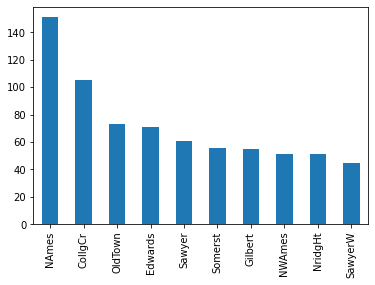

In [34]:
X_train['Neighborhood'].value_counts().sort_values(ascending=False).head(10).plot.bar()

<details><summary> Gợi ý </summary>

[value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

[sort_values()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html)

</details>

In [35]:
## Yêu cầu 4: tạo một list với các mục thường xuất hiện nhất của biến

## VIẾT CODE Ở ĐÂY:
top_10 = [
    x for x in X_train['Neighborhood'].value_counts().sort_values(ascending=False).head(10).index
]

top_10

['NAmes',
 'CollgCr',
 'OldTown',
 'Edwards',
 'Sawyer',
 'Somerst',
 'Gilbert',
 'NWAmes',
 'NridgHt',
 'SawyerW']

In [36]:
## Yêu cầu 5: tạo 10 biến nhị phân

for label in top_10:
    ## VIẾT CODE Ở ĐÂY:
    X_train['Neighborhood' + '_' + label] = np.where(
        X_train['Neighborhood'] == label, 1, 0)
    
    X_test['Neighborhood' + '_' + label] = np.where(X_test['Neighborhood'] == label,1,0)

# hãy hiển thị kết quả
## VIẾT CODE Ở ĐÂY:
X_train[['Neighborhood'] + ['Neighborhood'+'_'+c for c in top_10]].head(10)

,Neighborhood,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_Gilbert,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_SawyerW
64,CollgCr,0,1,0,0,0,0,0,0,0,0
682,ClearCr,0,0,0,0,0,0,0,0,0,0
960,BrkSide,0,0,0,0,0,0,0,0,0,0
1384,Edwards,0,0,0,1,0,0,0,0,0,0
1100,SWISU,0,0,0,0,0,0,0,0,0,0
416,Sawyer,0,0,0,0,1,0,0,0,0,0
1034,Crawfor,0,0,0,0,0,0,0,0,0,0
853,NAmes,1,0,0,0,0,0,0,0,0,0
472,Edwards,0,0,0,1,0,0,0,0,0,0
1011,Edwards,0,0,0,1,0,0,0,0,0,0


In [37]:
# chuyển các lệnh trước đó thành 2 hàm


def calculate_top_categories(df, variable, how_many=10):
    return [
        x for x in df[variable].value_counts().sort_values(
            ascending=False).head(how_many).index
    ]


def one_hot_encode(train, test, variable, top_x_labels):

    for label in top_x_labels:
        train[variable + '_' + label] = np.where(
            train[variable] == label, 1, 0)
        
        test[variable + '_' + label] = np.where(
            test[variable] == label,1, 0)

In [38]:
## Yêu cầu 6: chạy một vòng lặp qua các biến hạng mục còn lại

for variable in ['Exterior1st', 'Exterior2nd']:
    
    ## VIẾT CODE Ở ĐÂY:
    top_categories = calculate_top_categories(X_train,variable, how_many=10)
    
    ## VIẾT CODE Ở ĐÂY:
    one_hot_encode(X_train,X_test,variable,top_categories)

In [39]:
# hãy xem kết quả

X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_Gilbert,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Exterior2nd_BrkFace,Exterior2nd_AsbShng,Exterior2nd_Stucco
64,CollgCr,VinylSd,VinylSd,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
682,ClearCr,Wd Sdng,Wd Sdng,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
960,BrkSide,Wd Sdng,Plywood,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1384,Edwards,WdShing,Wd Shng,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1100,SWISU,Wd Sdng,Wd Sdng,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Lưu ý bây giờ chúng ta có 30 biến giả bổ sung thay vì 53 nếu tạo biến giả cho tất cả các hạng mục.

## Mã hóa one-hot của các hạng mục hàng đầu với Feature-Engine

### Ưu điểm

- nhanh
- tạo số lượng các đặc trưng trong tập huấn luyện tương tự như trong tập kiểm tra

### Hạn chế

- Chưa biết.

In [45]:
# chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']],  # các yếu tố dự báo
    data['SalePrice'],  # mục tiêu
    test_size=0.3,  # phần trăm các quan sát trong tập kiểm tra
    random_state=0)  # seed đảm bảo khả năng tái lặp

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [46]:
ohe_enc = OneHotEncoder(
    top_categories=10,  # có thể thay đổi giá trị này để chọn nhiều hoặc ít biến hơn
    # có thể lựa chọn biến để mã hóa
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'],
    drop_last=False)

ohe_enc.fit(X_train)

OneHotEncoder(top_categories=10,
              variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [47]:
# trong dict encoder, chúng ta thấy từng hạng mục hàng đầu 
# được chọn cho từng biến

ohe_enc.encoder_dict_

{'Neighborhood': ['NAmes',
  'CollgCr',
  'OldTown',
  'Edwards',
  'Sawyer',
  'Somerst',
  'Gilbert',
  'NWAmes',
  'NridgHt',
  'SawyerW'],
 'Exterior1st': ['VinylSd',
  'HdBoard',
  'Wd Sdng',
  'MetalSd',
  'Plywood',
  'CemntBd',
  'BrkFace',
  'WdShing',
  'Stucco',
  'AsbShng'],
 'Exterior2nd': ['VinylSd',
  'Wd Sdng',
  'HdBoard',
  'MetalSd',
  'Plywood',
  'CmentBd',
  'Wd Shng',
  'BrkFace',
  'AsbShng',
  'Stucco']}

In [48]:
# đây là list các biến mà encoder sẽ biến đổi

ohe_enc.variables_

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [49]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

# hãy khám phá kết quả
X_train.head()

,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_Gilbert,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_SawyerW,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Exterior2nd_BrkFace,Exterior2nd_AsbShng,Exterior2nd_Stucco
64,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
682,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1384,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1100,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


**Lưu ý**

Nếu các biến đối số được để thành None thì encoder sẽ tự động xác định **tất cả các biến hạng mục**. Tuyệt đúng không?

Encoder sẽ không mã hóa các biến dạng số. Vì vậy, nếu một số biến dạng số là biến hạng mục thì chúng ta sẽ cần ép kiểu lại chúng dưới dạng object trước khi sử dụng encoder. 